In [1]:
%matplotlib inline

import matplotlib
matplotlib.use('Agg')

from matplotlib import rc
rc('text', usetex=False)
matplotlib.rcParams['svg.fonttype'] = 'none'
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

import matplotlib.patches as patches
from matplotlib import patches as mpatches
from collections import OrderedDict, defaultdict
import seaborn as sns
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4)

from tqdm import tnrange, tqdm_notebook
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

/home/bay001/anaconda2/envs/brian/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


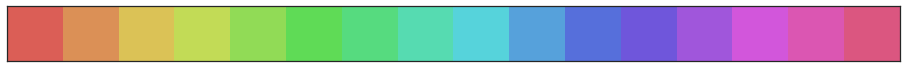

In [2]:
sns.set_style("white")
sns.set_context("talk", font_scale=1.4)

sns.palplot(sns.color_palette("hls", 16))
colors = sns.color_palette("hls", 16)
density_colors = [colors[0], colors[9], 'black']

# Plot RBP map (subtract)

In [3]:
import sys
sys.path.insert(0, '/home/bay001/projects/codebase/rbp-maps/maps/')
from density import Map
from density import ReadDensity
from density import normalization_functions
from density import RDPlotter
from density import LineObject as dline

def get_lines(d, c=0.95):
    density_incl = dline.LineObject(
        event_matrix=pd.read_table(d['included']['matrix'], sep=',', index_col=0),
        annotation='Included upon knockdown',
        conf=c,
        color=d['included']['color'],
        min_event_threshold=100
    )
    density_excl = dline.LineObject(
        event_matrix=pd.read_table(d['excluded']['matrix'], sep=',', index_col=0),
        annotation='Excluded upon knockdown',
        conf=c,
        color=d['excluded']['color'],
        min_event_threshold=100
    )
    density_bg = dline.LineObject(
        event_matrix=pd.read_table(d['background']['matrix'], sep=',', index_col=0),
        annotation='Native cassettes',
        conf=c,
        color=d['background']['color'],
        min_event_threshold=100
    )
    return density_incl, density_excl, density_bg

In [4]:
density_dir = '/home/bay001/projects/gabe_qc_20170612/data/'

In [5]:
density = defaultdict(dict)

rbfox2_density_included = os.path.join(density_dir, '204_01_RBFOX2.merged.r2.1.RBFOX2-BGHLV26-HepG2-included-upon-knockdown.normed_matrix.txt')
rbfox2_density_excluded = os.path.join(density_dir, '204_01_RBFOX2.merged.r2.1.RBFOX2-BGHLV26-HepG2-excluded-upon-knockdown.normed_matrix.txt')
rbfox2_density_native_cass = os.path.join(density_dir, '204_01_RBFOX2.merged.r2.1.HepG2_native_cassette_exons.normed_matrix.txt')

density['included'] = {
    'matrix':rbfox2_density_included,
    'color':density_colors[0]
}
density['excluded'] = {
    'matrix':rbfox2_density_excluded,
    'color':density_colors[1]
}
density['background'] = {
    'matrix':rbfox2_density_native_cass,
    'color':density_colors[2]
}

In [6]:
def plot(incl, excl, bg, d):
    
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15, 5))

    axs = [ax1, ax2, ax3, ax4]

    RDPlotter.plot_se([incl, excl, bg], axs, density_colors) # density_bg
    ax1.set_ylabel("Normalized Read Density")

    plt.tight_layout()

    incl_density_patch = mpatches.Patch(color=d['included']['color'], label='Incl upon KD')
    excl_density_patch = mpatches.Patch(color=d['excluded']['color'], label='Excl upon KD')

    leg = axs[0].legend(
        bbox_to_anchor=(1., 1.25), loc=1, mode="expand",
        handles=[incl_density_patch, excl_density_patch],
        borderaxespad=0., ncol=2
    )

((113, 1400), 'Included upon knockdown (113 events)')
((138, 1400), 'Excluded upon knockdown (138 events)')
((2555, 1400), 'Native cassettes (2555 events)')


/home/bay001/anaconda2/envs/brian/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


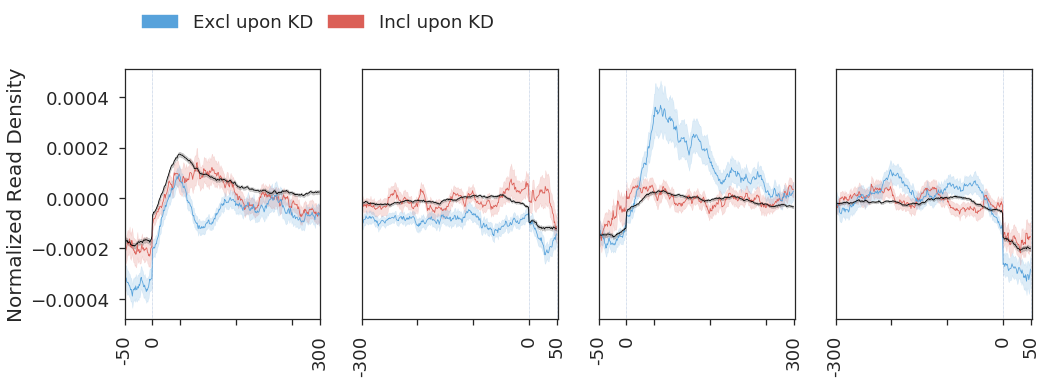

In [7]:
# plot once with the axes labels
incl, excl, bg = get_lines(density)
plot(incl, excl, bg, density)

# Plot RBP map  (Entropy)

In [8]:
density = defaultdict(dict)

rbfox2_density_included = os.path.join(density_dir, '204_01_RBFOX2.merged.r2.2.RBFOX2-BGHLV26-HepG2-included-upon-knockdown.normed_matrix.txt')
rbfox2_density_excluded = os.path.join(density_dir, '204_01_RBFOX2.merged.r2.2.RBFOX2-BGHLV26-HepG2-excluded-upon-knockdown.normed_matrix.txt')
rbfox2_density_native_cass = os.path.join(density_dir, '204_01_RBFOX2.merged.r2.2.HepG2_native_cassette_exons.normed_matrix.txt')

density['included'] = {
    'matrix':rbfox2_density_included,
    'color':density_colors[0]
}
density['excluded'] = {
    'matrix':rbfox2_density_excluded,
    'color':density_colors[1]
}
density['background'] = {
    'matrix':rbfox2_density_native_cass,
    'color':density_colors[2]
}

((113, 1400), 'Included upon knockdown (113 events)')
((138, 1400), 'Excluded upon knockdown (138 events)')
((2555, 1400), 'Native cassettes (2555 events)')


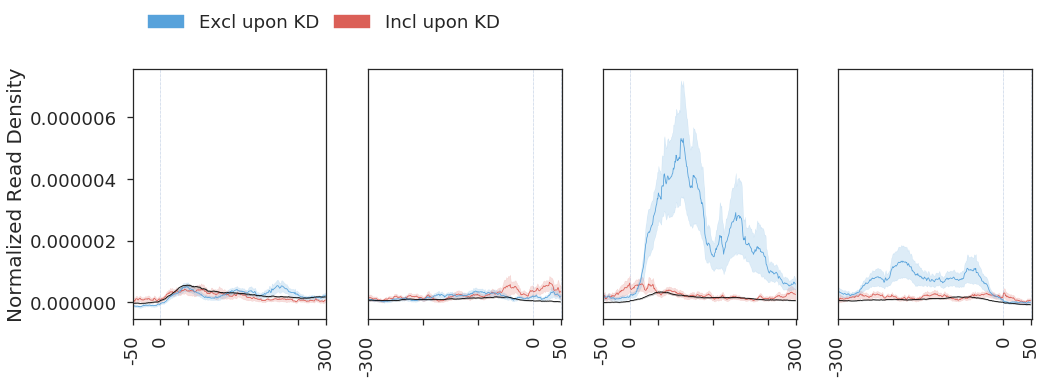

In [9]:
# plot once with the axes labels
incl, excl, bg = get_lines(density)
plot(incl, excl, bg, density)